In [1]:
import numpy as np
import pandas as pd

In [2]:
dataset = pd.read_csv("/Users/joykukreja/Downloads/framingham.csv")
dataset.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [3]:
dataset.rename(columns = {'TenYearCHD':'10YrHeartDiseaseRisk'}, inplace=True)

In [4]:
dataset

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,10YrHeartDiseaseRisk
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [5]:
dataset.isna().sum()

male                      0
age                       0
education               105
currentSmoker             0
cigsPerDay               29
BPMeds                   53
prevalentStroke           0
prevalentHyp              0
diabetes                  0
totChol                  50
sysBP                     0
diaBP                     0
BMI                      19
heartRate                 1
glucose                 388
10YrHeartDiseaseRisk      0
dtype: int64

In [6]:
dataset.drop(columns=['education'], inplace=True)

In [7]:
dataset

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,10YrHeartDiseaseRisk
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [8]:
dataset.isna().sum()

male                      0
age                       0
currentSmoker             0
cigsPerDay               29
BPMeds                   53
prevalentStroke           0
prevalentHyp              0
diabetes                  0
totChol                  50
sysBP                     0
diaBP                     0
BMI                      19
heartRate                 1
glucose                 388
10YrHeartDiseaseRisk      0
dtype: int64

In [9]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

In [10]:
dataset = imputer.fit_transform(dataset)

In [11]:
df = pd.DataFrame(dataset, columns=['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', '10YrHeartDiseaseRisk'])

In [12]:
df

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,10YrHeartDiseaseRisk
0,1.0,39.0,0.0,0.0,0.00000,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.000000,0.0
1,0.0,46.0,0.0,0.0,0.00000,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.000000,0.0
2,1.0,48.0,1.0,20.0,0.00000,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.000000,0.0
3,0.0,61.0,1.0,30.0,0.00000,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.000000,1.0
4,0.0,46.0,1.0,23.0,0.00000,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1.0,50.0,1.0,1.0,0.00000,0.0,1.0,0.0,313.0,179.0,92.0,25.97,66.0,86.000000,1.0
4234,1.0,51.0,1.0,43.0,0.00000,0.0,0.0,0.0,207.0,126.5,80.0,19.71,65.0,68.000000,0.0
4235,0.0,48.0,1.0,20.0,0.02963,0.0,0.0,0.0,248.0,131.0,72.0,22.00,84.0,86.000000,0.0
4236,0.0,44.0,1.0,15.0,0.00000,0.0,0.0,0.0,210.0,126.5,87.0,19.16,86.0,81.966753,0.0


In [13]:
df.isna().sum()

male                    0
age                     0
currentSmoker           0
cigsPerDay              0
BPMeds                  0
prevalentStroke         0
prevalentHyp            0
diabetes                0
totChol                 0
sysBP                   0
diaBP                   0
BMI                     0
heartRate               0
glucose                 0
10YrHeartDiseaseRisk    0
dtype: int64

In [14]:
y = df['10YrHeartDiseaseRisk']
X = df.drop(columns=['10YrHeartDiseaseRisk'])

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
X_train

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
3252,1.0,40.0,1.0,30.0,0.0,0.0,0.0,0.0,205.0,131.0,81.0,23.74,66.0,87.0
3946,0.0,57.0,0.0,0.0,0.0,0.0,1.0,0.0,250.0,152.5,92.5,32.31,75.0,94.0
1261,0.0,47.0,0.0,0.0,0.0,0.0,0.0,0.0,230.0,123.0,71.0,26.98,83.0,73.0
2536,1.0,41.0,1.0,30.0,0.0,0.0,0.0,0.0,228.0,113.0,82.5,25.67,67.0,70.0
4089,0.0,64.0,0.0,0.0,0.0,0.0,1.0,0.0,232.0,149.5,84.0,20.49,68.0,96.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3444,0.0,36.0,1.0,5.0,0.0,0.0,1.0,0.0,222.0,147.0,94.0,26.79,76.0,71.0
466,0.0,57.0,1.0,15.0,0.0,0.0,0.0,0.0,250.0,125.0,74.0,21.08,80.0,72.0
3092,0.0,60.0,0.0,0.0,0.0,0.0,1.0,0.0,298.0,133.0,89.0,25.09,83.0,81.0
3772,1.0,39.0,1.0,10.0,0.0,0.0,0.0,0.0,215.0,102.0,64.5,24.50,68.0,62.0


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [18]:
logres = LogisticRegression()
param_grid = {'C':[1,2,4,6,8,10,20,50,100], 'penalty':['l1', 'l2', 'elasticnet'], 'max_iter':[100,200,500]}

In [19]:
logrescv = GridSearchCV(logres, param_grid, scoring='accuracy')

In [20]:
logrescv

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 4, 6, 8, 10, 20, 50, 100],
                         'max_iter': [100, 200, 500],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [22]:
logrescv.fit(X_train, y_train)
#ignore warnings

/opt/homebrew/Caskroom/miniconda/base/envs/sklearn-env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/Caskroom/miniconda/base/envs/sklearn-env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 4, 6, 8, 10, 20, 50, 100],
                         'max_iter': [100, 200, 500],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [23]:
logrescv.best_params_

{'C': 4, 'max_iter': 500, 'penalty': 'l2'}

In [24]:
logrescv.best_score_

0.8516224188790561

In [26]:
y_predict = logrescv.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score, classification_report

In [28]:
accuracy_score(y_predict, y_test)

0.8596698113207547

In [29]:
print(classification_report(y_predict, y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.86      0.92       831
         1.0       0.09      0.65      0.16        17

    accuracy                           0.86       848
   macro avg       0.54      0.76      0.54       848
weighted avg       0.97      0.86      0.91       848



In [30]:
import seaborn as sns

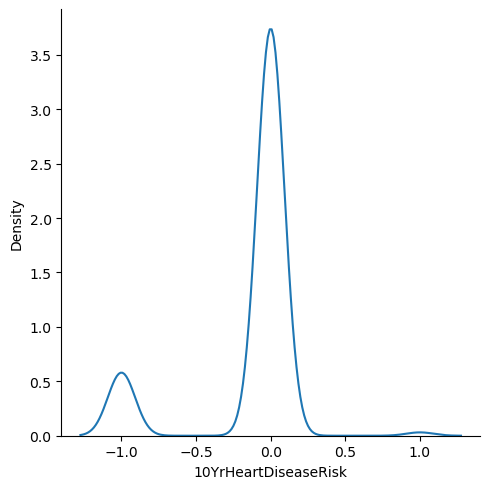

In [31]:
sns.displot(y_predict - y_test, kind='kde')

In [32]:
import pickle